# 1. Importando as bibliotecas

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import re
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import (DecisionTreeClassifier, plot_tree)
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import StackingClassifier

# 2. Lendo os dados 

In [56]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

# 3. Explorando o dataset de treino

In [57]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [58]:
info1_train = df_train.info()
info2_train = df_train.isna().sum()
info3_train = df_train.dtypes

info = pd.concat([info1_train, info2_train, info3_train])
info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


PassengerId          0
Survived             0
Pclass               0
Name                 0
Sex                  0
Age                177
SibSp                0
Parch                0
Ticket               0
Fare                 0
Cabin              687
Embarked             2
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [59]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


- Considerações acerca do dataset de treino:

Passageiros de classe mais pobres são maioria (média da classe esta em 2,308642)

O passageiro mais velho tem 80 anos de idade e a média de idade é de 29 anos

A maioria dos passageiros é homem (média de 0,351685)

Apenas 38% dos passageiros sobreviveram 

# 4. Explorando o dataset de teste

In [60]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [61]:
info1_test = df_test.info()
info2_test = df_test.isna().sum()
info3_test = df_test.dtypes

info = pd.concat([info1_test, info2_test, info3_test])
info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


PassengerId          0
Pclass               0
Name                 0
Sex                  0
Age                 86
SibSp                0
Parch                0
Ticket               0
Fare                 1
Cabin              327
Embarked             0
PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [62]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


- considerações acerca do dataset de teste:

A maioria dos passageiros são de classes mais pobres (média da classe em 2,265550)

A maioria dos passageiros são homens (média de 0,36211)

O passageiro mais velho tem 76 anos e a média é de 30 anos


# 5. Tratando o dataset de treino


## 5.1 Dummy sexo


In [64]:
def transformar(valor):
    if valor == 'female':
        return 1
    else:
        return 0
    
df_train['sexo_dummy'] = df_train['Sex'].map(transformar)
df_test['sexo_dummy'] = df_test['Sex'].map(transformar)

In [65]:
df_test.shape

(418, 12)

In [66]:
df_train = df_train.drop(columns = ['Sex'])
df_test = df_test.drop(columns = ['Sex'])

In [67]:
df_test.shape

(418, 11)

## 5.2 Identificando e tratando os outliers

In [68]:
# variáveis numéricas:
numerical = [var for var in df_train.columns if df_train[var].dtype!='O']
numerical = [var for var in numerical if var not in['Survived', 'PassengerId', 'sexo_dummy', 'idade_dummy']]
numerical
# variaveis numericas continuas: Age e Fare
# variaveis numéricas discretas: Pclass, SibSp, Parch

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

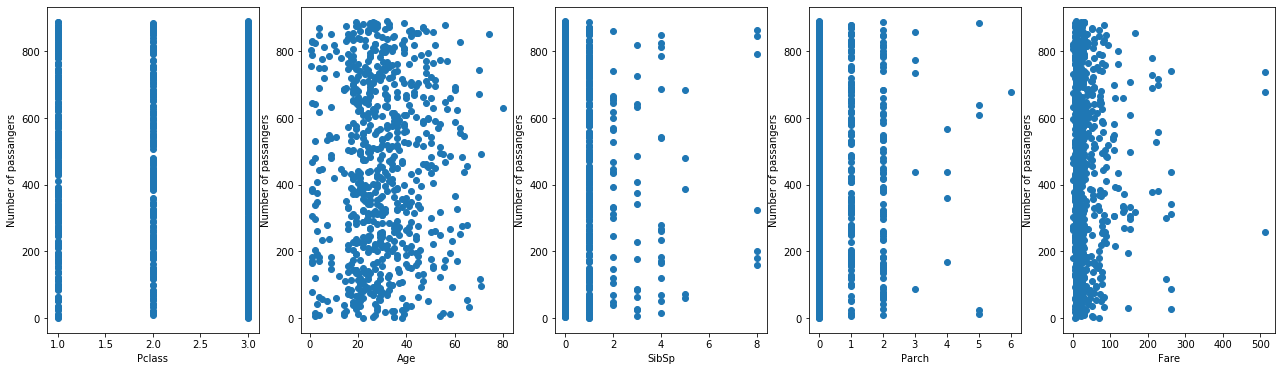

In [69]:
# plotand gráficos de dispersão para as variáveis numéricas
plt.figure(figsize=(22,6))
idx = 1
for i in numerical:
    plt.subplot(1,len(numerical),idx)
    plt.scatter(df_train[numerical[idx-1]],df_train[numerical[idx-1]].index)
    plt.ylabel('Number of passangers')
    plt.xlabel(numerical[idx-1])
    idx = idx + 1

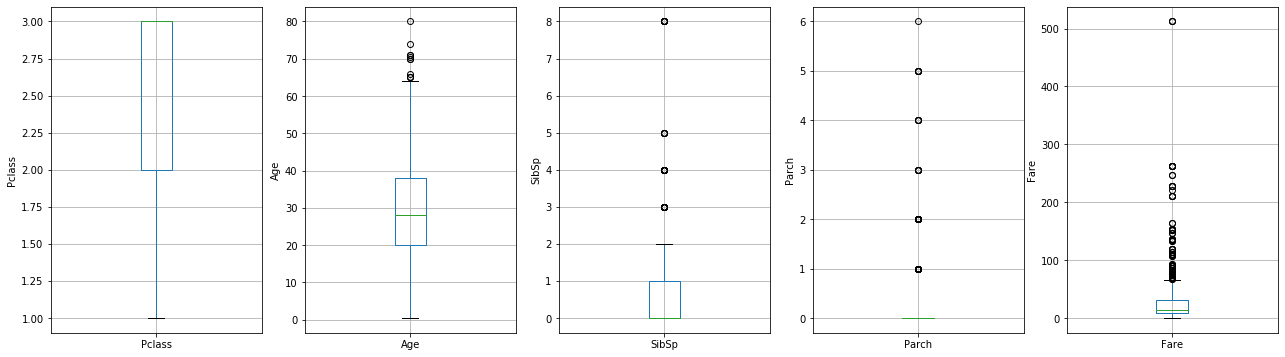

In [70]:
# plotando o box plot para as variáveis numéricas
plt.figure(figsize=(22,6))
idx = 1
for i in numerical:
    plt.subplot(1,len(numerical),idx)
    df_train.boxplot(column = numerical[idx-1])
    plt.ylabel(numerical[idx-1])
    idx=idx+1

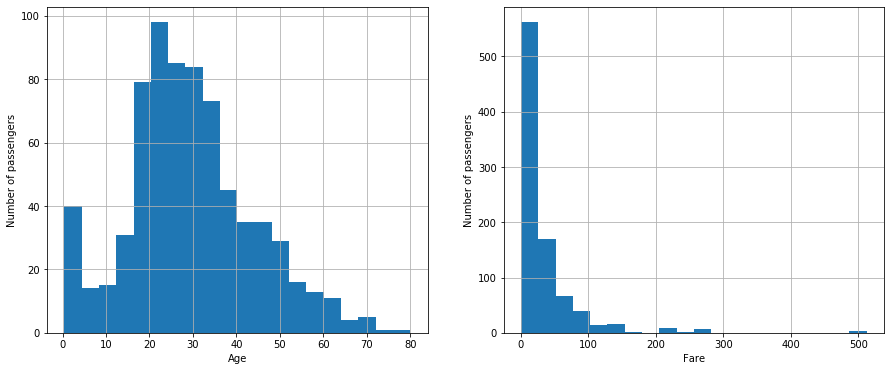

In [71]:
# checando a distribuição das variaveis continuas para decidir qual método usar para distinguir os outliers
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
fig = df_train.Age.hist(bins=20)
fig.set_ylabel('Number of passengers')
fig.set_xlabel('Age')
 
plt.subplot(1, 2, 2)
fig = df_train.Fare.hist(bins=20)
fig.set_ylabel('Number of passengers')
fig.set_xlabel('Fare');

In [72]:
#encontrando os outliers

#idade - variável continua com distibuição ~ de uma normal - construção de um intervalo de confiança para outliers
down_limit = df_train['Age'].mean() - 3*df_train['Age'].std()
up_limit = df_train['Age'].mean() + 3*df_train['Age'].std()
print(f'Os limites de outlier para a variável Age são: menor que {down_limit} e maior que {up_limit}')

#passagem - variavel continua com distribuição assimétrica - boxplot para detecção de outliers
DIQ = df_train['Fare'].quantile(0.75) - df_train['Fare'].quantile(0.25)
down_fence = df_train['Fare'].quantile(0.25) - (DIQ*1.5)
up_fence = df_train['Fare'].quantile(0.75) + (DIQ*1.5)
print(f'Os limites de outlier para a variável fare são: menor que {down_fence} e maior que {up_fence}')

#SibSp - variável numérica discreta - boxplot para detecção de outliers
IQR_sib = df_train['SibSp'].quantile(0.75) - df_train['SibSp'].quantile(0.25)
down_fence_Sip = df_train['SibSp'].quantile(0.25) - (IQR_sib*1.5)
up_fence_Sip = df_train['SibSp'].quantile(0.75) + (IQR_sib*1.5)
print(f'Os limites de outlier para a variável SibSp são: menor que {down_fence_Sip} e maior que {up_fence_Sip}')

#Parch - variável numérica discreta - boxplot para detecção de outliers
IQR_parch = df_train['Parch'].quantile(0.75) - df_train['Parch'].quantile(0.25)
down_fence_parch = df_train['Parch'].quantile(0.25) - (IQR_parch*1.5)
up_fence_parch = df_train['Parch'].quantile(0.75) + (IQR_parch*1.5)
print(f'Os limites de outlier para a variável Parch são: menor que {down_fence_parch} e maior que {up_fence_parch}')

Os limites de outlier para a variável Age são: menor que -13.88037434994331 e maior que 73.27860964406095
Os limites de outlier para a variável fare são: menor que -26.724 e maior que 65.6344
Os limites de outlier para a variável SibSp são: menor que -1.5 e maior que 2.5
Os limites de outlier para a variável Parch são: menor que 0.0 e maior que 0.0


In [73]:
# criando as colunas de outliers nos datasets de treino e teste

df_train['out_age'] = df_train['Age'].apply(lambda x: 1 if x < down_limit or x > up_limit else 0)
df_test['out_age'] = df_test['Age'].apply(lambda x: 1 if x < down_limit or x > up_limit else 0)

df_train['out_fare'] = df_train['Fare'].apply(lambda x: 1 if x < down_fence or x > up_fence else 0)
df_test['out_fare'] = df_test['Fare'].apply(lambda x: 1 if x < down_fence or x > up_fence else 0)

df_train['out_sibsp'] = df_train['SibSp'].apply(lambda x: 1 if x < down_fence_Sip or x > up_fence_Sip else 0)
df_test['out_sibsp'] = df_test['SibSp'].apply(lambda x: 1 if x < down_fence_Sip or x > up_fence_Sip else 0)

df_train['out_parch'] = df_train['Parch'].apply(lambda x: 1 if x < down_fence_parch or x > up_fence_parch else 0)
df_test['out_parch'] = df_test['Parch'].apply(lambda x: 1 if x < down_fence_parch or x > up_fence_parch else 0)

In [74]:
df_test.shape

(418, 15)

## 5.3 Preenchendo os valores inexistentes das variáveis default

In [75]:
# excluir a coluna cabin se a % de dados faltantes for maior que 75%
faltas_cabin = df_train['Cabin'].isna().sum()/len(df_train.index)
if faltas_cabin > 0.75:
    df_train = df_train.drop(columns = ['Cabin'], axis =1)

In [76]:
# preenchendo os Nan da variável idade com zero
df_train['Age'] = df_train['Age'].fillna(0)
#sinalizando para o modelo as idades faltantes
df_train['idade_dummy'] = np.where(df_train['Age'] != 0, 0, 1)
# completando a coluna de porto de embarque com a moda
print(df_train.Embarked.mode())
df_train['Embarked'] = df_train['Embarked'].fillna('S')

0    S
dtype: object


In [77]:
# excluir a coluna cabin se a % de dados faltantes for maior que 75%
faltas_cabin_test = df_test['Cabin'].isna().sum()/len(df_test.index)
if faltas_cabin_test > 0.75:
    df_test = df_test.drop(columns = ['Cabin'], axis =1)

In [78]:
# preenchendo os Nan da variável idade com zero
df_test['Age'] = df_test['Age'].fillna(0)
# sinalizando para o modelo as idades faltantes
df_test['idade_dummy'] = np.where(df_test['Age'] != 0, 0, 1)
# preenchendo o único valor faltante de variável Fare
df_test['Fare'] = df_test['Fare'].fillna(df_test['Fare'].median())
# completando a coluna de porto de embarque com a moda
print(df_test.Embarked.mode())
df_test['Embarked'] = df_test['Embarked'].fillna('S')

0    S
dtype: object


## 5.4 Tratando variáveis com números e letras

In [79]:
# treino
# extraindo a parte numérica- treino 
df_train['ticket_numerica'] = df_train.Ticket.apply(lambda s: s.split()[-1])
df_train['ticket_numerica'] = np.where(df_train.ticket_numerica.str.isdigit(), df_train.ticket_numerica, np.nan)
df_train['ticket_numerica'] = df_train['ticket_numerica'].astype('float')
# extraindo a parte categorica - treino
df_train['ticket_categ'] = df_train.Ticket.apply(lambda s: s.split()[0])
df_train['ticket_categ'] = np.where(df_train.ticket_categ.str.isdigit(), np.nan, df_train.ticket_categ)
# padronizando a parte categorica - retirando caracteres que não são letras e transformando tudo em maiusculo
text = df_train.ticket_categ.apply(lambda x: re.sub("[^a-zA-Z]", '', str(x)))
text = text.str.upper()
df_train['ticket_categ'] = text

# teste
# extraindo a parte numérica - teste
df_test['ticket_numerica'] = df_test.Ticket.apply(lambda s: s.split()[-1])
df_test['ticket_numerica'] = np.where(df_test.ticket_numerica.str.isdigit(), df_test.ticket_numerica, np.nan)
df_test['ticket_numerica'] = df_test['ticket_numerica'].astype('float')
# extraindo a parte categorica - teste
df_test['ticket_categ'] = df_test.Ticket.apply(lambda s: s.split()[0])
df_test['ticket_categ'] = np.where(df_test.ticket_categ.str.isdigit(), np.nan, df_test.ticket_categ)
# # padronizando a parte categorica - retirando caracteres que não são letras e transformando tudo em maiusculo
text2 = df_test.ticket_categ.apply(lambda x: re.sub("[^a-zA-Z]", '', str(x)))
text2 = text2.str.upper()
df_test['ticket_categ'] = text2

In [80]:
df_train = df_train.drop(['Ticket'], axis=1)
df_test = df_test.drop(['Ticket'], axis=1)

## 5.5 Extraindo os títulos dos nomes

In [81]:
def titulo (nome):
    line = nome
    if re.search('Mrs', line):
        return 'Mrs'
    elif re.search('Mr', line):
        return 'Mr'
    elif re.search('Miss', line):
        return 'Miss'
    elif re.search('Master', line):
        return 'Master'
    else:
        return 'Other'
    
df_train['titulo'] = df_train['Name'].apply(titulo)
df_test['titulo'] = df_test['Name'].apply(titulo)

df_train[['Name', 'titulo']].head()

,Name,titulo
0,"Braund, Mr. Owen Harris",Mr
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mrs
2,"Heikkinen, Miss. Laina",Miss
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mrs
4,"Allen, Mr. William Henry",Mr


In [82]:
# excluindo a coluna nomes
df_train = df_train.drop(['Name'], axis=1)
df_test = df_test.drop(['Name'], axis =1)

## 5.6 Adicionando uma variável tamanho da familia

In [83]:
df_train['familia_size'] = df_train['SibSp'] + df_train['Parch']
df_test['familia_size'] = df_test['SibSp'] + df_test['Parch']


## 5.7 Analisando valores faltantes das novas variáveis e valores raros

In [84]:
df_train.isna().sum()
df_train['ticket_numerica'] = df_train['ticket_numerica'].fillna(0)

In [85]:
df_train.isna().sum()

PassengerId        0
Survived           0
Pclass             0
Age                0
SibSp              0
Parch              0
Fare               0
Embarked           0
sexo_dummy         0
out_age            0
out_fare           0
out_sibsp          0
out_parch          0
idade_dummy        0
ticket_numerica    0
ticket_categ       0
titulo             0
familia_size       0
dtype: int64

In [86]:
freq = df_train.ticket_categ.value_counts()/df_train.ticket_categ.value_counts().sum()
df = pd.DataFrame(data=freq)
df.reset_index()
df = df[df['ticket_categ']<0.01]
df['codigo'] = df.index
lista1 = df['codigo'].tolist()
lista1

['SOC',
 'C',
 'FCC',
 'LINE',
 'WEP',
 'SCAH',
 'PP',
 'SOPP',
 'PPP',
 'SOTONO',
 'SWPP',
 'SCA',
 'AS',
 'SC',
 'SP',
 'FC',
 'CASOTON',
 'SOP',
 'FA',
 'SCOW']

In [87]:
df_train['ticket_categ'] = df_train['ticket_categ'].apply(lambda x: 'raro' if x in lista1 else x)
del freq
del lista1
del df

In [88]:
df_train['ticket_categ'].value_counts()

NAN        661
PC          60
raro        47
CA          41
A           28
STONO       18
SOTONOQ     15
SCPARIS     11
WC          10
Name: ticket_categ, dtype: int64

In [89]:
freq = df_test.ticket_categ.value_counts()/df_test.ticket_categ.value_counts().sum()
df = pd.DataFrame(data=freq)
df.reset_index()
df = df[df['ticket_categ']<0.01]
df['codigo'] = df.index
lista1 = df['codigo'].tolist()
lista1

['SOPP',
 'FCC',
 'C',
 'STONO',
 'SCA',
 'AQ',
 'SCAH',
 'FC',
 'SOC',
 'SC',
 'LP',
 'STONOQ',
 'WEP',
 'PP',
 'SOTONO']

In [90]:
df_test['ticket_categ'] = df_test['ticket_categ'].apply(lambda x: 'raro' if x in lista1 else x)
del freq
del lista1
del df

In [91]:
df_test['ticket_categ'].value_counts()

NAN        296
PC          32
raro        30
CA          27
A           11
SOTONOQ      9
SCPARIS      8
WC           5
Name: ticket_categ, dtype: int64

## 5.8 Verificando se os datasets contém valores vazios

In [92]:
df_train.isna().sum()

PassengerId        0
Survived           0
Pclass             0
Age                0
SibSp              0
Parch              0
Fare               0
Embarked           0
sexo_dummy         0
out_age            0
out_fare           0
out_sibsp          0
out_parch          0
idade_dummy        0
ticket_numerica    0
ticket_categ       0
titulo             0
familia_size       0
dtype: int64

In [93]:
df_test.isna().sum()

PassengerId        0
Pclass             0
Age                0
SibSp              0
Parch              0
Fare               0
Embarked           0
sexo_dummy         0
out_age            0
out_fare           0
out_sibsp          0
out_parch          0
idade_dummy        0
ticket_numerica    0
ticket_categ       0
titulo             0
familia_size       0
dtype: int64

# 6. Fazer o encode das variáveis categóricas e escalando as numéricas

## 6.1 Usando Weight of Evidence - 'WoE' para o encode das variáveis "object"


O método WoE para variáveis categóricas que não tem significado ordinal nos dá uma taxa de ocorrência para a variável com a situação target. No caso do titanic, é transformar as siglas em médias de sobreviventes que tinham aquela caracteristica.


In [94]:
var_categ = ['Embarked', 'ticket_categ', 'titulo']
def encode_categorica(var, target):
    order_label = df_train.groupby([var])[target].mean() #calcula a proporção de ocorrencias em cada variavel
    
    df_train[var] = df_train[var].map(order_label) #substitui a categórica pela proporção
    df_test[var] = df_test[var].map(order_label) #substitui a categórica pela proporção

for var in var_categ:
    encode_categorica(var, 'Survived') # aplica a função em cada variavel categorica para os sobreviventes

In [95]:
df_train.dtypes

PassengerId          int64
Survived             int64
Pclass               int64
Age                float64
SibSp                int64
Parch                int64
Fare               float64
Embarked           float64
sexo_dummy           int64
out_age              int64
out_fare             int64
out_sibsp            int64
out_parch            int64
idade_dummy          int32
ticket_numerica    float64
ticket_categ       float64
titulo             float64
familia_size         int64
dtype: object

In [96]:
df_test.dtypes

PassengerId          int64
Pclass               int64
Age                float64
SibSp                int64
Parch                int64
Fare               float64
Embarked           float64
sexo_dummy           int64
out_age              int64
out_fare             int64
out_sibsp            int64
out_parch            int64
idade_dummy          int32
ticket_numerica    float64
ticket_categ       float64
titulo             float64
familia_size         int64
dtype: object

# 7. Separando o dataset de teste e treino 

In [97]:
treino_vars = [var for var in df_train.columns if var not in ['PassengerId', 'Survived']]

In [98]:
X_train, X_test, y_train, y_test = train_test_split(df_train[treino_vars], df_train['Survived'], test_size=0.20)

In [99]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((712, 16), (179, 16), (712,), (179,))

## 7.1 Fazendo o Scale

O scale é necessário quando se tem variáveis com diferentes magnitudes ou unidades. Como a maioria dos algoritmos usam a distância euclidiana entre dois pontos, essas variações grandes podem ser um problema trazendo maior peso para variáveis com grandes magnitudes. Levando em consideração que no dataset temos variáveis com medidas muito diferentes, sera realizado o scale.

Dos quatro métodos mais comuns (Z-score, Normalização pela média, MinMax, Vetor unico) para o scale sera usado o MinMaxScaling que produz valores entre 0 e 1 e não reduz a importância de outliers.

In [100]:
minmax_scaler = preprocessing.MinMaxScaler()
minmax_scaler.fit(X_train[treino_vars])

MinMaxScaler(copy=True, feature_range=(0, 1))

# 8. Especificando os modelos

## 8.1 Função para todos os modelos

In [101]:
def model_builder(pipeline, params, cv, classifier_name, data_split = False):
    #cv = StratifiedKFold(n_splits = kfolds)
    grid_model = GridSearchCV(pipeline, params, cv = cv, verbose = 0, n_jobs = -1)
    grid = grid_model.fit(minmax_scaler.transform(X_train), y_train)
    
    print('Melhores parametros: ')
    print(grid_model.best_params_)
    print(' ')
    
    grid_model = grid_model.best_estimator_
    
    results = cross_val_score(grid_model,minmax_scaler.transform(X_test),y_test,cv=cv)
    y_predict = grid_model.predict(minmax_scaler.transform(X_test))
    
    print('Accuracy ' + classifier_name)
    print('Validação cruzada score: ' + str(round(results.mean(), 6)))
    
    return results, grid_model

In [102]:
# regressão logistica

pipe_log = make_pipeline(PCA(), LogisticRegression())
params_log = {
    "pca__n_components" : [2, 6, 10, 16, 18],
    "logisticregression__C": [0.001, 0.01, 0.1, 1, 1.1, 10],
    "logisticregression__max_iter": [1000],
    "logisticregression__solver" : ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]}

score_log, grid_log = model_builder(pipe_log, params_log, 10, 'Regressão Logistica')

Melhores parametros: 
{'logisticregression__C': 1, 'logisticregression__max_iter': 1000, 'logisticregression__solver': 'newton-cg', 'pca__n_components': 10}
 
Accuracy Regressão Logistica
Validação cruzada score: 0.848693


In [103]:
# SVM 

pipe_svm = make_pipeline(PCA(), SVC())
params_svm = {
    "pca__n_components" : [2, 6, 10, 16],
    "svc__C" : [0.01, 0.1, 1, 1.1, 2],
    "svc__gamma" : [0.01, 0.1, 1]}

score_svm, grid_svm = model_builder(pipe_svm, params_svm, 10, "SVM")

Melhores parametros: 
{'pca__n_components': 16, 'svc__C': 2, 'svc__gamma': 0.1}
 
Accuracy SVM
Validação cruzada score: 0.848693


In [104]:
# KNN

pipe_knn = make_pipeline(KNeighborsClassifier())
params_knn = {
    #"pca__n_components" : [2, 6, 10, 18],
    "kneighborsclassifier__n_neighbors": [3, 5, 7, 9, 10, 12, 14, 16],
    "kneighborsclassifier__leaf_size": [10, 20, 30, 40]}

score_knn, grid_knn = model_builder(pipe_knn, params_knn, 10, "KNN")

Melhores parametros: 
{'kneighborsclassifier__leaf_size': 10, 'kneighborsclassifier__n_neighbors': 14}
 
Accuracy KNN
Validação cruzada score: 0.843137


In [105]:
# random forest 
pipe_rf = make_pipeline(PCA(), RandomForestClassifier())
params_rf = {
    "pca__n_components" : [2, 6, 10, 18],
    'randomforestclassifier__n_estimators': [10, 20, 50, 100, 200, 300],
    'randomforestclassifier__max_depth': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16],
    'randomforestclassifier__min_samples_leaf': [2, 5, 3, 7]}

score_rf, grid_rf = model_builder(pipe_rf, params_rf, 10, "Random Forest")

Melhores parametros: 
{'pca__n_components': 10, 'randomforestclassifier__max_depth': 10, 'randomforestclassifier__min_samples_leaf': 5, 'randomforestclassifier__n_estimators': 20}
 
Accuracy Random Forest
Validação cruzada score: 0.815359


In [121]:
# bagging 

pipe_bag = make_pipeline(PCA(), BaggingClassifier())
params_bag = {
    "pca__n_components" : [2, 6, 10, 18],
    'baggingclassifier__n_estimators' : [30, 50, 70, 100],
    'baggingclassifier__max_features' : [3, 5, 7, 9],
    'baggingclassifier__max_samples' : [3, 5, 7, 9]}

score_bag, grid_bag, = model_builder(pipe_bag, params_bag, 10, 'Bagging')

Melhores parametros: 
{'baggingclassifier__max_features': 7, 'baggingclassifier__max_samples': 9, 'baggingclassifier__n_estimators': 100, 'pca__n_components': 10}
 
Accuracy Bagging
Validação cruzada score: 0.787255


In [ ]:
# stacking

estimadores = [('logit', grid_log),
              ('SVM', grid_svm),
              ('KNN', grid_knn),
              ('random forest', grid_rf),
              ('bagging', grid_bag)]

cv = StratifiedKFold(n_splits = 5)

stack =  StackingClassifier(estimators = estimadores, final_estimator=LogisticRegression())
stack.fit(minmax_scaler.transform(X_train), y_train);

stack_result = cross_val_score(stack,minmax_scaler.transform(X_test),y_test,cv=cv)
print('Accuracy Stacking')
print('Validação cruzada score: ' + str(round(stack_result.mean(), 6)))

## 8.1 Aplicando o modelo de maior acurácia no dataset de teste

In [108]:
df_test_sub = df_test.drop(columns=['PassengerId'])

In [118]:
y_pred_stack = stack.predict(minmax_scaler.transform(df_test_sub))

In [119]:
submission = pd.DataFrame({'PassengerId': df_test['PassengerId'],
                          'Survived': y_pred_stack})

In [120]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [112]:
submission.shape

(418, 2)

In [113]:
submission.to_csv(r'C:\Users\alana\notebooks\desafio 3\submission.csv', index = False)